# Assignment: Data Cleaning and Exploratory Data Analysis on Adult Income Dataset

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

## 1. Data Cleaning

###Load the dataset.

In [107]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?')
df

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###inspect its structure

In [108]:
print('Dataset shape:', df.shape)
print('\nColumns:')
print(df.columns.tolist())

print('\nData types:')
print(df.dtypes)
print(df.info())
print('\nSummary statistics for numerical features:')
print(df.describe())

Dataset shape: (32561, 15)

Columns:
['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non

In [109]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

In [110]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)
df.dropna(inplace=True)
print('Shape after dropping missing values:', df.shape)
print(df.isnull().sum())

Missing values in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64
Shape after dropping missing values: (30162, 15)
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


### Identify and remove duplicate records.

In [111]:
duplicates = df.duplicated().sum()
print('Number of duplicate records:', duplicates)
df.drop_duplicates(inplace=True)
print('Shape after removing duplicates:', df.shape)

Number of duplicate records: 23
Shape after removing duplicates: (30139, 15)


### Detecting and Treating Outliers

We use the Interquartile Range (IQR) method to detect and cap outlier.

In [112]:
df.sample(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8987,43,Private,177905,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,3908,0,40,United-States,<=50K
31715,22,State-gov,124942,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,45,United-States,<=50K


Detecting Outlier

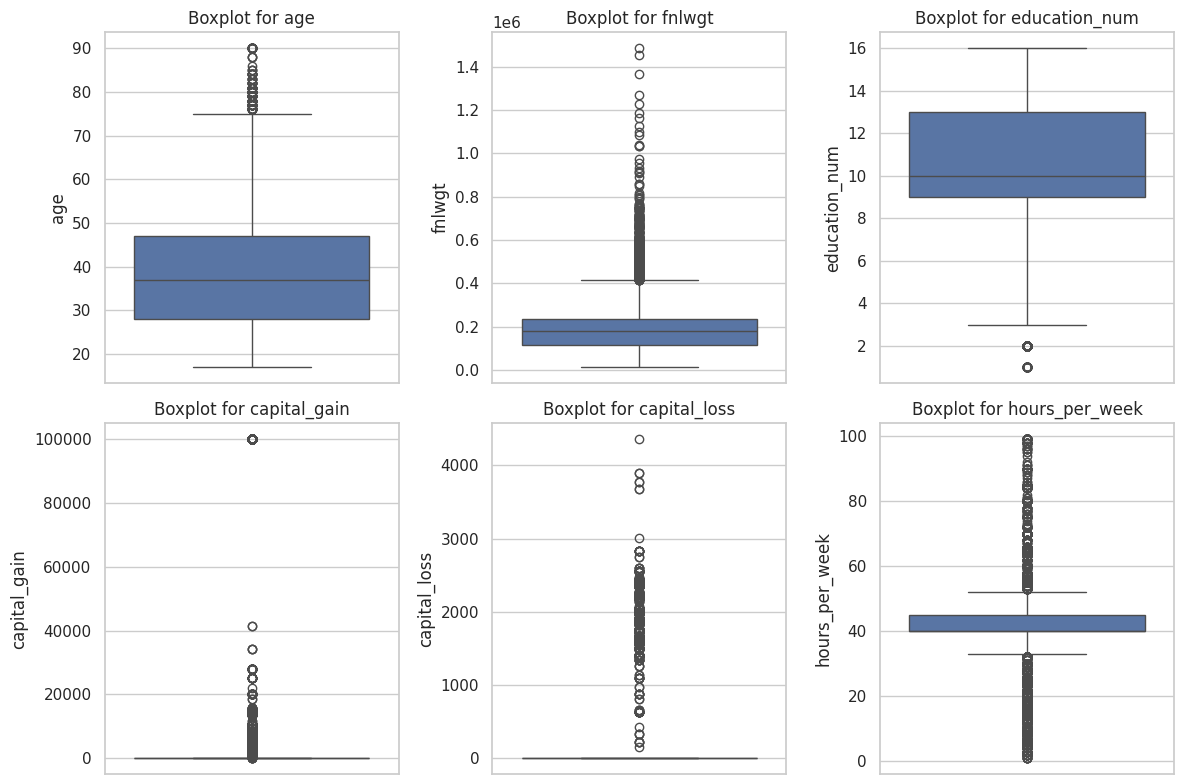

In [113]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

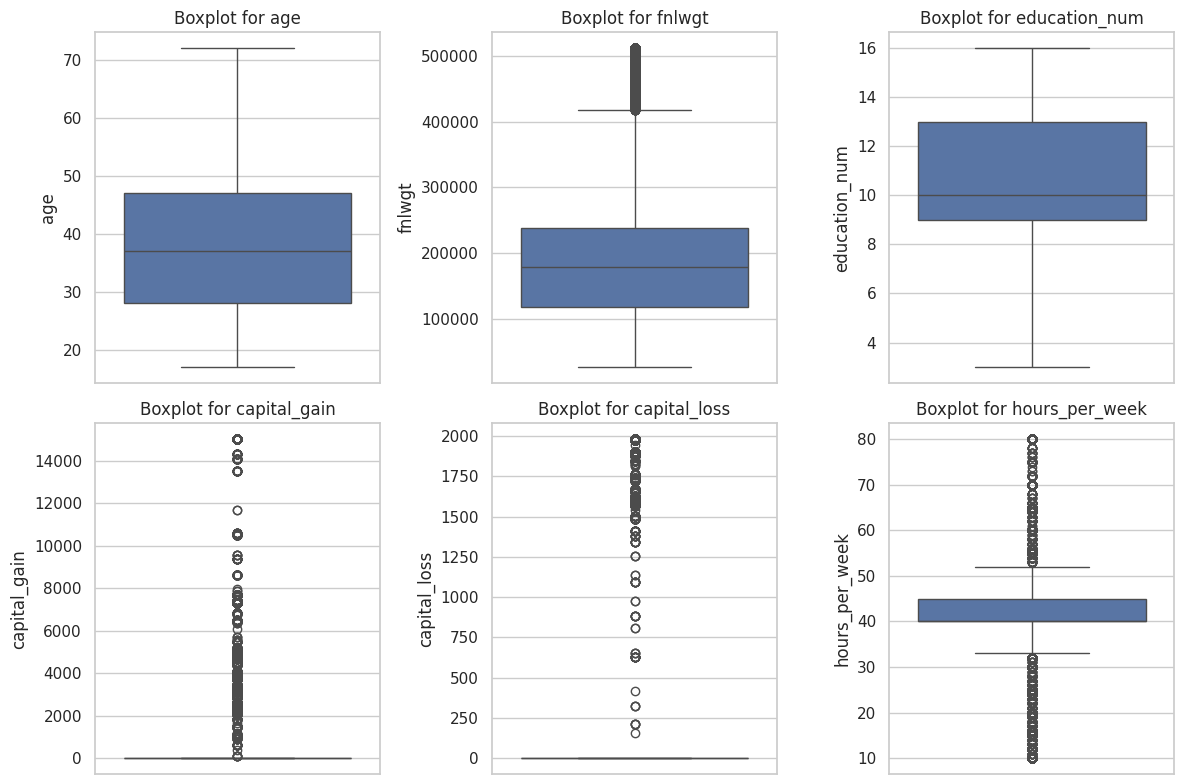

In [114]:
def cap_outliers(series):
    lower_quantile = series.quantile(0.01)
    upper_quantile = series.quantile(0.99)
    return series.clip(lower=lower_quantile, upper=upper_quantile)
for col in num_cols:
    df[col] = cap_outliers(df[col])

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Standardizing Categorical Values

In [115]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

print( df['workclass'].unique())
print( df['occupation'].unique())
print( df['income'].unique())

['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay']
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'transport-moving' 'farming-fishing'
 'machine-op-inspct' 'tech-support' 'craft-repair' 'protective-serv'
 'armed-forces' 'priv-house-serv']
['<=50k' '>50k']


## 2. Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Summary statistics for numerical variables

In [116]:
print(df.describe())

                age         fnlwgt  education_num  capital_gain  capital_loss  \
count  30139.000000   30139.000000   30139.000000  30139.000000  30139.000000   
mean      38.381632  188583.398981      10.130396    647.802946     85.159959   
std       12.951564   99811.030604       2.524520   2550.725773    386.100369   
min       17.000000   27156.420000       3.000000      0.000000      0.000000   
25%       28.000000  117627.500000       9.000000      0.000000      0.000000   
50%       37.000000  178417.000000      10.000000      0.000000      0.000000   
75%       47.000000  237604.500000      13.000000      0.000000      0.000000   
max       72.000000  511205.020000      16.000000  15024.000000   1980.000000   

       hours_per_week  
count    30139.000000  
mean        40.891403  
std         11.546407  
min         10.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         80.000000  


#### Frequency distributions for categorical variables

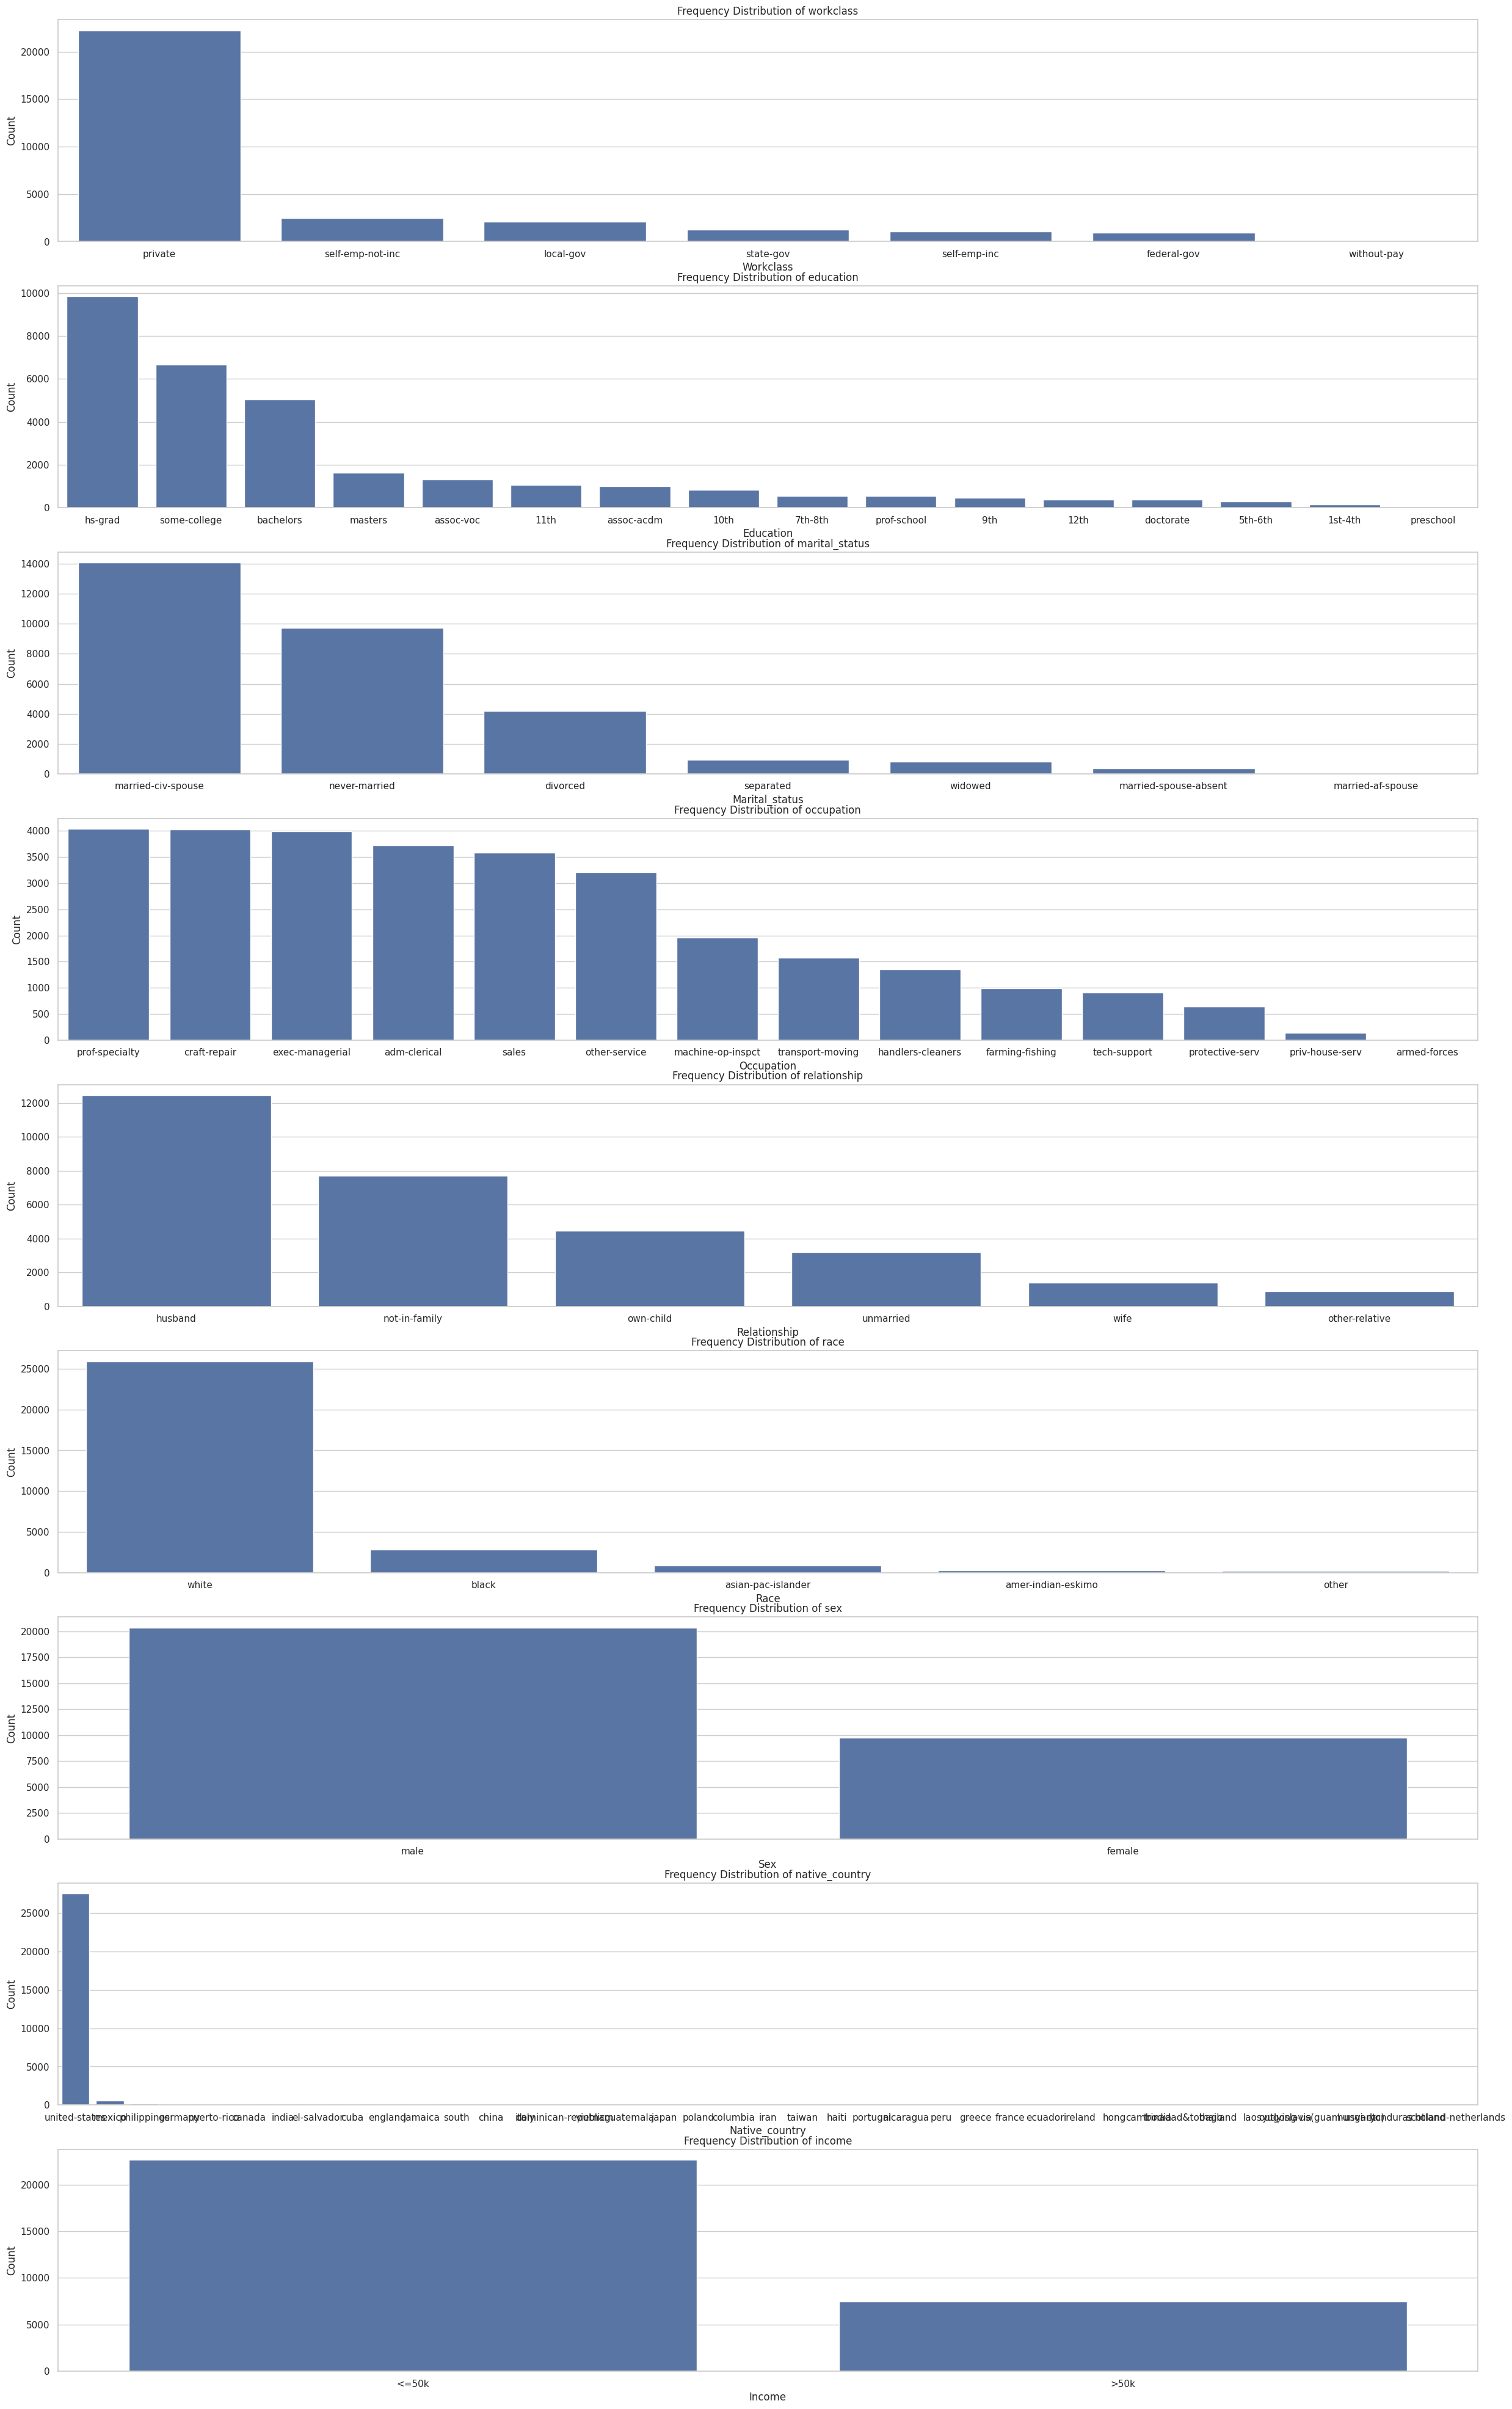

In [117]:
plt.figure(figsize=(30, 50))

for i, col in enumerate(cat_cols):
    plt.subplot(9, 1, i + 1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(f'Frequency Distribution of {col}')
plt.show()


In [118]:
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2798,35,private,27156.42,11th,7,never-married,other-service,unmarried,amer-indian-eskimo,male,0,0,40,united-states,<=50k
27309,38,private,357870.00,12th,8,never-married,machine-op-inspct,not-in-family,black,female,0,0,50,united-states,<=50k
15892,72,private,88991.00,bachelors,13,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,england,>50k


#### Histograms for numerical features

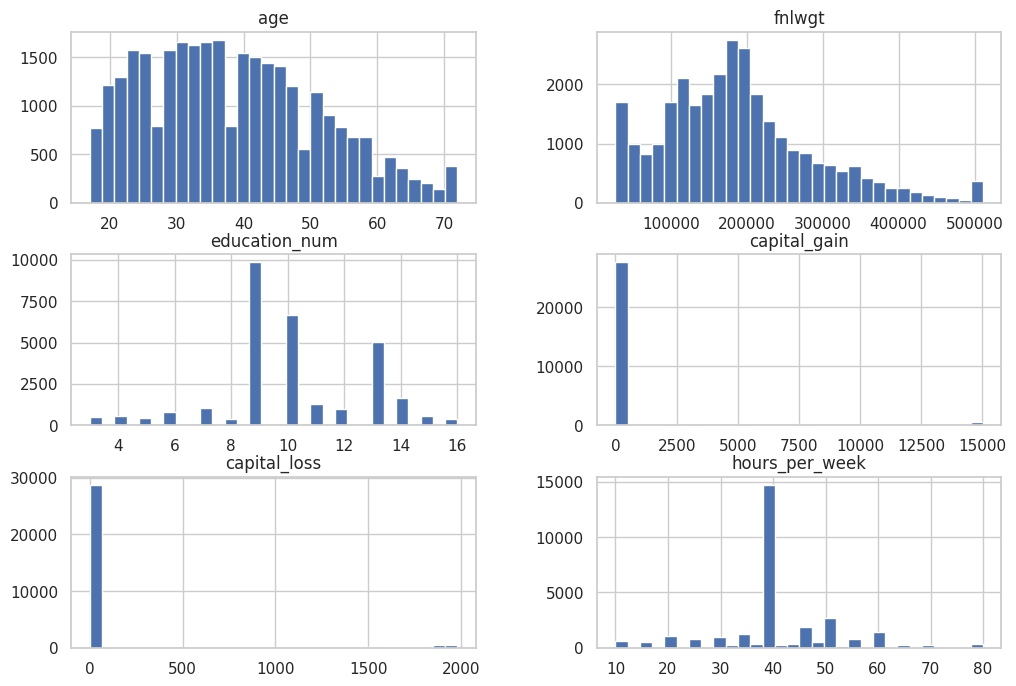

In [119]:
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.show()

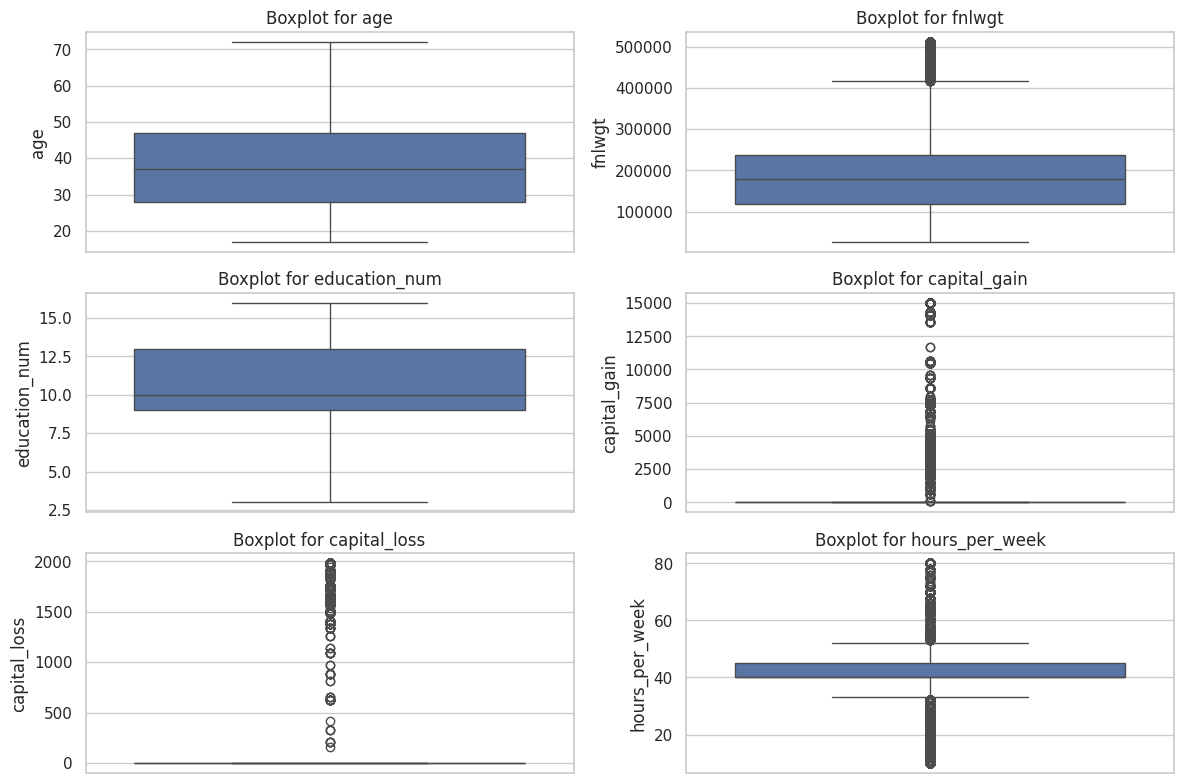

In [120]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Bivariate Analysis


#### Correlation matrix for numerical features

In [121]:
corr_matrix = df[num_cols].corr()
print('Correlation matrix:')
print(corr_matrix)


Correlation matrix:
                     age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.077796       0.046453      0.127771      0.057463   
fnlwgt         -0.077796  1.000000      -0.045443     -0.002443     -0.008462   
education_num   0.046453 -0.045443       1.000000      0.169190      0.080769   
capital_gain    0.127771 -0.002443       0.169190      1.000000     -0.056018   
capital_loss    0.057463 -0.008462       0.080769     -0.056018      1.000000   
hours_per_week  0.109793 -0.023008       0.158068      0.106790      0.053407   

                hours_per_week  
age                   0.109793  
fnlwgt               -0.023008  
education_num         0.158068  
capital_gain          0.106790  
capital_loss          0.053407  
hours_per_week        1.000000  


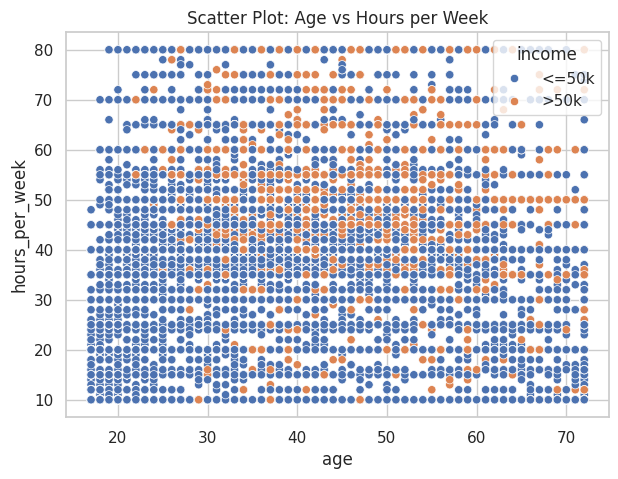

In [122]:
# Scatter plot: Age vs Hours per Week, colored by income
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='hours_per_week', hue='income', data=df)
plt.title('Scatter Plot: Age vs Hours per Week')
plt.show()

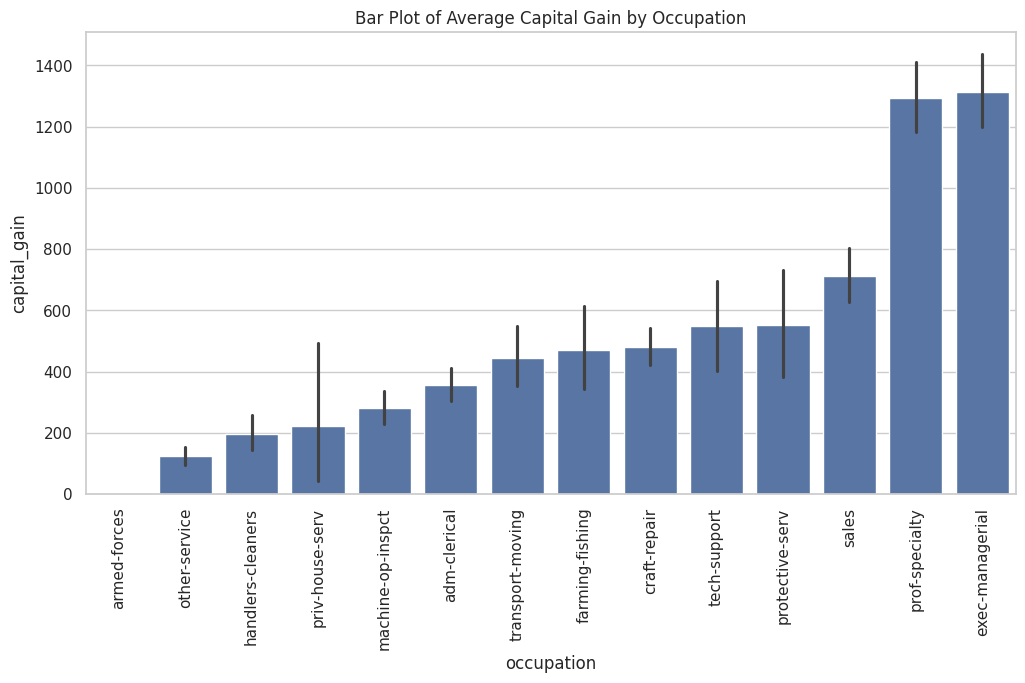

In [123]:
# Bar plot: Count of individuals by workclass
plt.figure(figsize=(12,6))
sns.barplot(x='occupation', y='capital_gain', data=df, estimator=np.mean, order=df.groupby('occupation')['capital_gain'].mean().sort_values().index)
plt.xticks(rotation=90)
plt.title('Bar Plot of Average Capital Gain by Occupation')
plt.show()


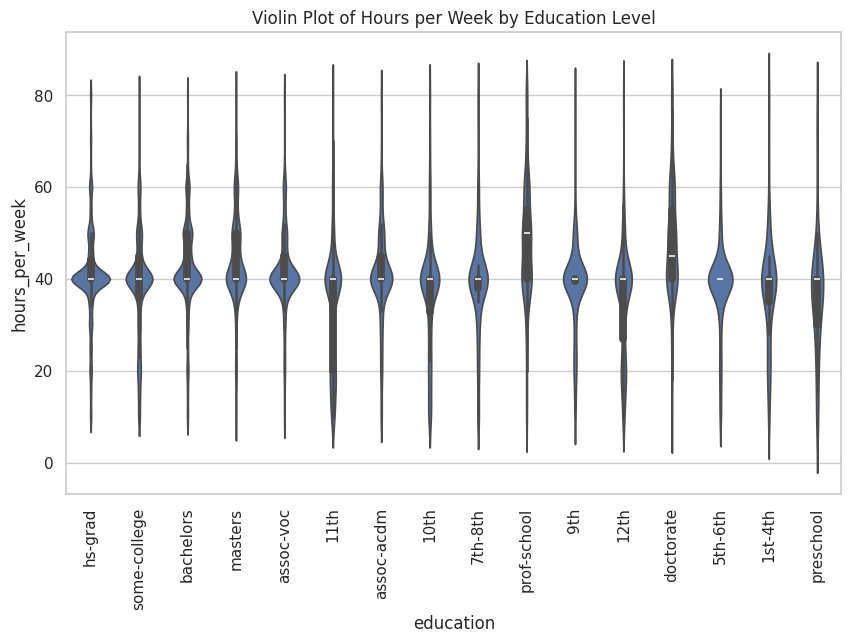

In [124]:
plt.figure(figsize=(10,6))
sns.violinplot(x='education', y='hours_per_week', data=df, order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Violin Plot of Hours per Week by Education Level')
plt.show()


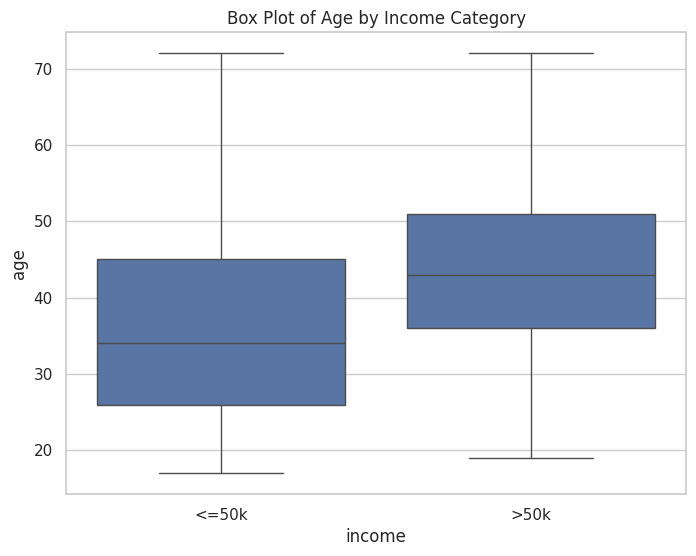

In [125]:
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Box Plot of Age by Income Category')
plt.show()

### Multivariate Analysis

#### Pair plot

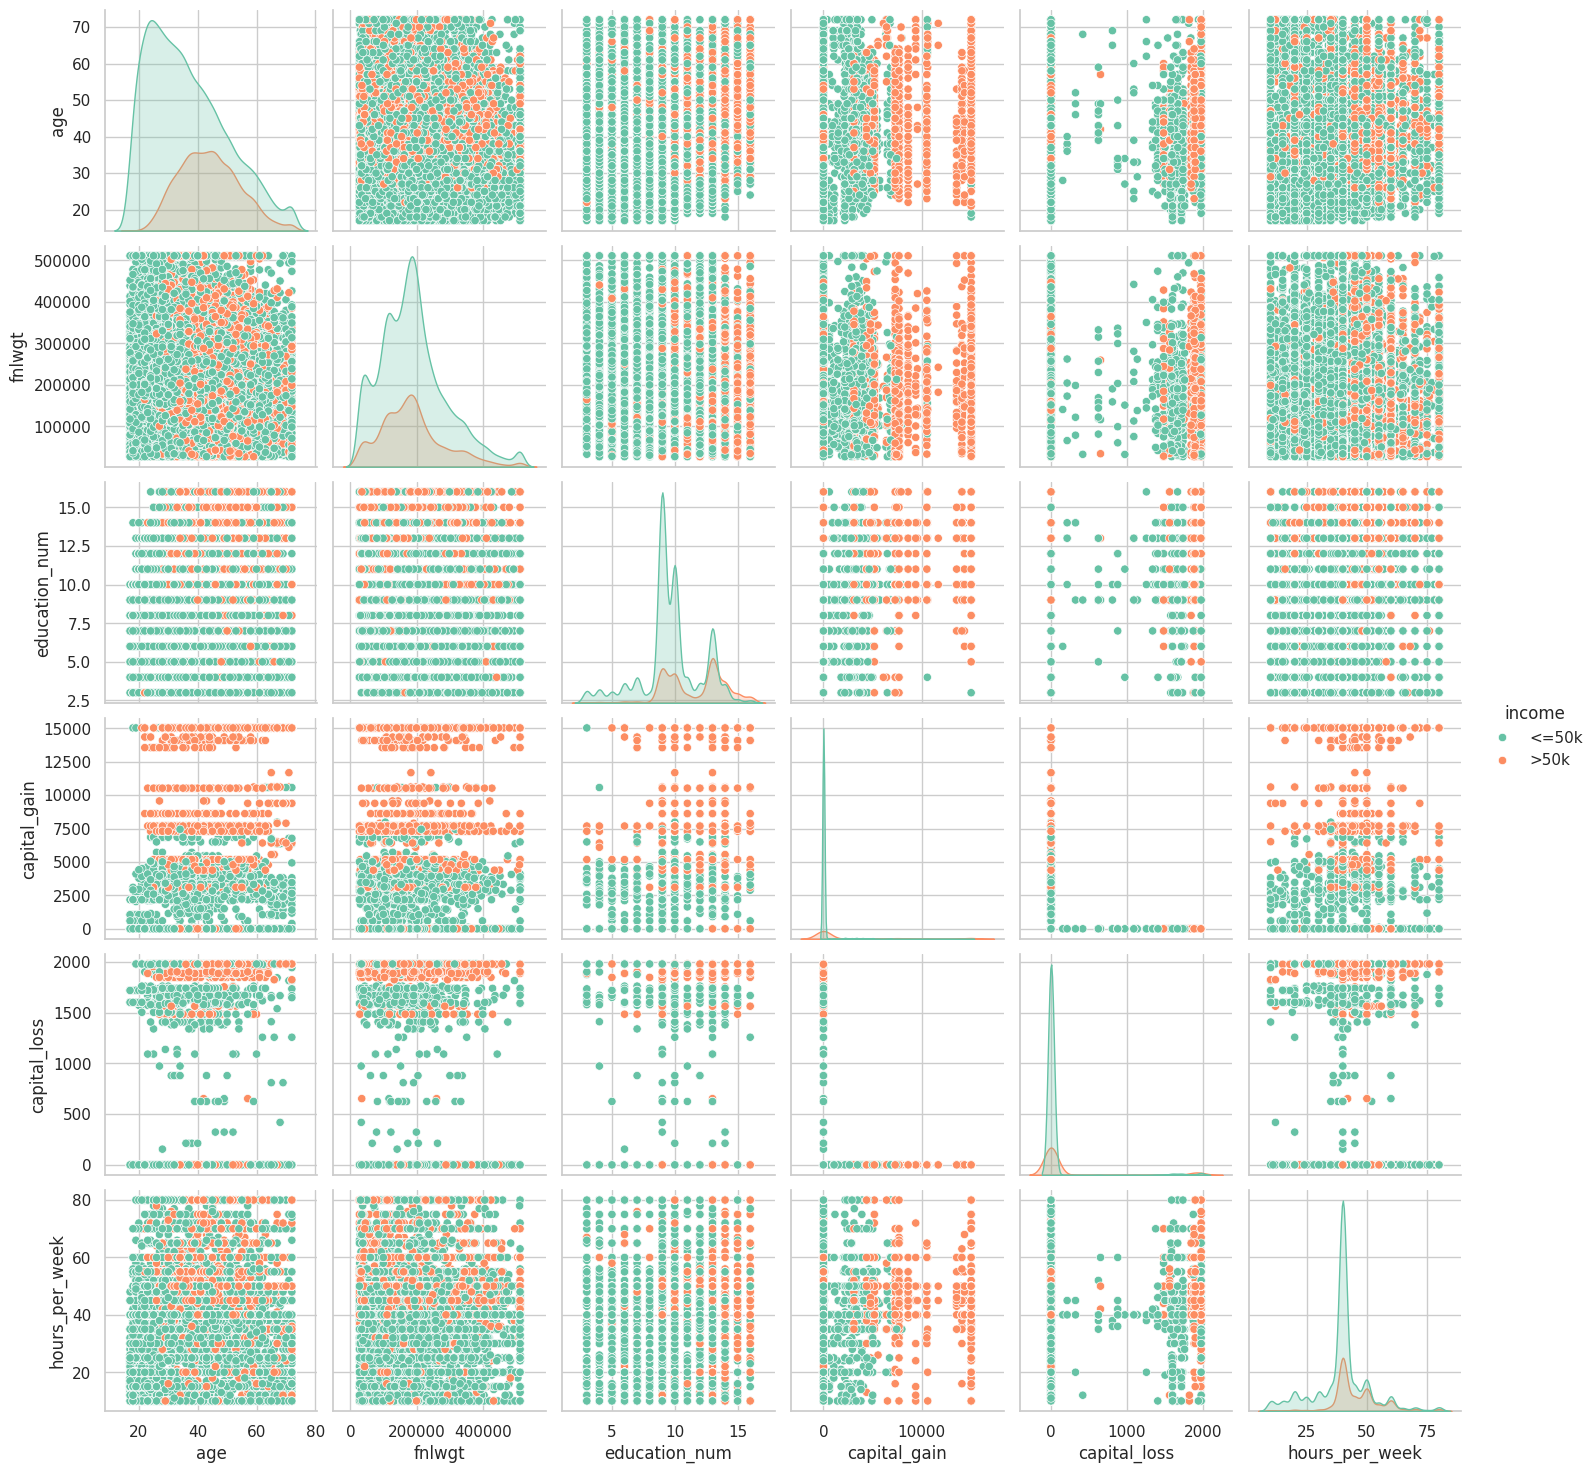

In [126]:
sns.pairplot(df[num_cols + ['income']], hue='income', palette='Set2')
plt.show()


#### Heatmap of correlations

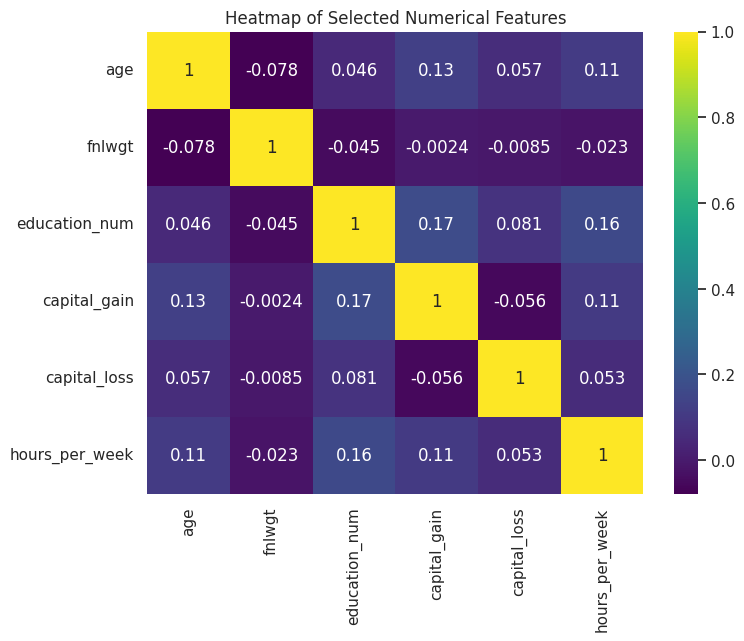

In [127]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Selected Numerical Features')
plt.show()

  income   education  hours_per_week
0  <=50k        10th       36.973719
1  <=50k        11th       33.632963
2  <=50k        12th       34.876437
3  <=50k     1st-4th       37.846154
4  <=50k     5th-6th       38.501818
5  <=50k     7th-8th       39.472169
6  <=50k         9th       38.395349
7  <=50k  assoc-acdm       39.938830
8  <=50k   assoc-voc       41.232606
9  <=50k   bachelors       40.919067


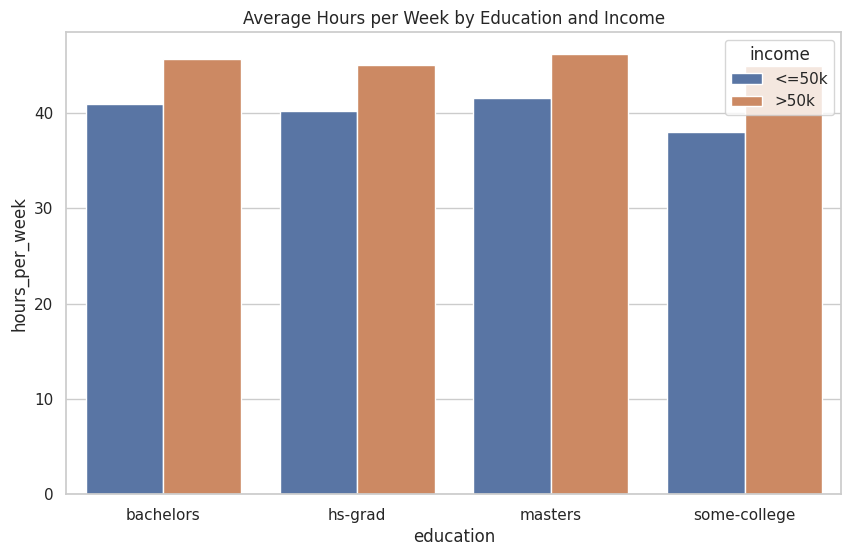

In [128]:
# Grouped comparison: Average hours per week by income and education level
grouped = df.groupby(['income', 'education'])['hours_per_week'].mean().reset_index()
print(grouped.head(10))

# Bar plot for the grouped comparison
sample_educ = grouped[grouped['education'].isin(['bachelors', 'hs-grad', 'some-college', 'masters'])]
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='hours_per_week', hue='income', data=sample_educ)
plt.title('Average Hours per Week by Education and Income')
plt.show()

## Summary Report

In this notebook we have:

- Cleaned the Data:  
  1) Loaded the Adult Income dataset and inspected its structure.  
  2)Handled missing values by dropping rows with missing data.  
  3)Removed duplicate records.  
  4) Detected and treated outliers in key numerical features using the IQR method with winsorization.  
  5)Standardized categorical variables by stripping whitespace and converting text to lowercase.  
  
- Performed Exploratory Data Analysis (EDA):  
  1)Univariate Analysis: Examined summary statistics, frequency distributions, histograms, and box plots for numerical and categorical features.  
  2)Bivariate Analysis: Explored relationships between numerical features (with correlation matrices and scatter plots) and between categorical and numerical variables (with bar plots).  
  3) Multivariate Analysis: Utilized pair plots, heatmaps, and grouped comparisons to analyze complex interactions among multiple variables.  